# Consortship in Yellow Baboons
DATA601 Project

Oct 16, 2019

Melissa Hall, Victor Hart, and Luke Larter

### Male Reproductive Success
For males of sexually reproducing species, mating access to females is a crucial factor shaping each individual’s reproductive success (Bateman, 1948). When females are monopolizable by males during their most likely time of conception, males compete intensely for access to females (Andersson, 1994). Yellow baboon females exhibit conspicuous sexual swellings when fertile (Wildt et al., 1977), and become fertile asynchronously, allowing dominant males to effectively monopolize them when conception is most likely. This results in a positive correlation between male rank and reproductive success (Alberts, Buchan, & Altmann, 2006). 


### Consortship
Consortship is a highly successful strategy for male baboons. A form of mate guarding, the male will maintain proximity to a fertile female for hours or days, mating with her and detering other males from mating with her (Seyfarth 1978).


### Our Purpose
We will investigate consortship behaviour both in terms of male motivation to consort, and constraints on males’ ability to engage in consortship. This will allow us to more fully understand the factors shaping male reproductive tactics, and ultimately give us a clearer idea of how sexual selection functions in primates, and in animals more broadly. 

## The Data
The dataset is from a study by Tung et al. (2012) on baboon mating, comprised of observing eight groups of baboons from 1980 to 2007. They recorded whether they observed mating (1/0) or consortship (1/0) between each male-female pair during that female baboon's fertile window. Tung et al.'s study focused on genetic effects on mating, while our focus is on consortships.

The data is provided under a creative commons license, CC0 1.0 Universal, indicating the work is dedicated to the worldwide public domain and available for us to use. 

In [28]:
#Imports
import numpy as np
import pandas as pd
import plotly as plotly
import plotly.graph_objs as go
import plotly.express as px
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn

In [29]:
#load baboon database
bdata = pd.read_csv("baboon_mating.csv")
display(bdata.head(10))
print("Total number of rows:", len(bdata.index))

,female_id,male_id,cycle_id,consort,conceptive,female_hybridscore,male_hybridscore,female_gendiv,male_gendiv,gen_distance,female_age,male_rank,female_rank,males_present,females_present,male_rank_transform,gen_distance_transform,rank_interact,assort_index,female_age_transform
0,ABB,LUI,5068,1,0,0.307333,0.465667,0.7857,0.9286,0.0335,7.156742,3,2,6,9,0.100575,0.998878,6,0.370115,-0.238929
1,ABB,IAG,5068,0,0,0.307333,0.213333,0.7857,0.7143,-0.0581,7.156742,6,2,6,9,0.017162,0.996624,12,0.544898,-0.238929
2,ABB,LAX,5068,0,0,0.307333,0.291333,0.7857,1.0000,-0.2084,7.156742,1,2,6,9,0.326917,0.956569,2,0.490870,-0.238929
3,ABB,LEB,5068,0,0,0.307333,0.476667,0.7857,0.7857,0.1218,7.156742,2,2,6,9,0.181328,0.985165,4,0.362496,-0.238929
4,ABB,NAW,5068,0,0,0.307333,0.367333,0.7857,0.8571,0.1836,7.156742,5,2,6,9,0.030942,0.966291,10,0.438227,-0.238929
5,ABB,ZIB,5068,0,0,0.307333,0.635000,0.7857,0.7692,0.0716,7.156742,4,2,6,9,0.055785,0.994873,8,0.252823,-0.238929
6,ABB,LUI,5073,1,0,0.307333,0.465667,0.7857,0.9286,0.0335,7.252567,4,2,7,9,0.066666,0.998878,8,0.370115,-0.232285
7,ABB,FIG,5073,0,0,0.307333,0.386667,0.7857,1.0000,0.2762,7.252567,1,2,7,9,0.305485,0.923714,2,0.424836,-0.232285
8,ABB,IAG,5073,0,0,0.307333,0.213333,0.7857,0.7143,-0.0581,7.252567,7,2,7,9,0.014549,0.996624,14,0.544898,-0.232285
9,ABB,LAX,5073,0,0,0.307333,0.291333,0.7857,1.0000,-0.2084,7.252567,2,2,7,9,0.183920,0.956569,4,0.490870,-0.232285


Total number of rows: 12141


In [30]:
#remove uneeded columns
bdata = bdata.drop(columns=['female_hybridscore', 'male_hybridscore', 'female_gendiv', 'male_gendiv',
                           'gen_distance', 'female_rank', 'gen_distance_transform', 'rank_interact',
                           'assort_index', 'female_age_transform'])
display(bdata.head(10))
print("Total number of rows:", len(bdata.index))

,female_id,male_id,cycle_id,consort,conceptive,female_age,male_rank,males_present,females_present,male_rank_transform
0,ABB,LUI,5068,1,0,7.156742,3,6,9,0.100575
1,ABB,IAG,5068,0,0,7.156742,6,6,9,0.017162
2,ABB,LAX,5068,0,0,7.156742,1,6,9,0.326917
3,ABB,LEB,5068,0,0,7.156742,2,6,9,0.181328
4,ABB,NAW,5068,0,0,7.156742,5,6,9,0.030942
5,ABB,ZIB,5068,0,0,7.156742,4,6,9,0.055785
6,ABB,LUI,5073,1,0,7.252567,4,7,9,0.066666
7,ABB,FIG,5073,0,0,7.252567,1,7,9,0.305485
8,ABB,IAG,5073,0,0,7.252567,7,7,9,0.014549
9,ABB,LAX,5073,0,0,7.252567,2,7,9,0.183920


Total number of rows: 12141


### Columns of Interest
- **female_id**: 3 character code, unique identifier for individual females
- **male_id**: 3 character code, unique identifier for individual males
- **cycle_id**: integer, unique identifier for each combination of female and their fertile cycle
- **consort**: boolean value for whether the male exhibited consortship behavior with the female
- **conceptive**: boolean value for whether the female’s cycle was conceptive
- **female_age**: decimal, the female’s age at the time of copulation
- **male_rank**: integer, the male’s rank at the time of copulation
    - **male_rank_transform**: decimal, transformation of male rank that takes group size into account
- **males_present**: integer, number of males present in the group
- **females_present**: integer, number of females present in the group 

## Guiding Question 1: Constraints on Male Ability to Form Consortships:

Male mating patterns in baboons are regulated by each male’s position within the strict dominance hierarchy of the group (Alberts et al., 2006). Thus, rank likely acts as a constraint on a male’s ability to consort at opportune times and, ultimately, on his reproductive success. The following questions will allow us to examine this relationship:

- Is there a positive linear relationship between a male’s rank and his ability to obtain a consort?
- If the above relationship is present, does this correlation differ during both conceptive and non-conceptive cycles?


### Male Rank vs Proportion of Consortships Formed / Matings; Chosen method
Because the presence of consortship is a categorical variable (1 or 0) for each male during each individual female cycle, and we wanted to see if there was a linear relationship between a male's rank and his consort success, I had to turn this into a continuous variable. We did this by looking at the proportion of cycles in which a male consorted (described below).

Male ranks change over time often from cycle to cycle, so when using consortship proportion (which is a summary measure over several cycles), there are often multiple rank values for each individual male. As such, I clustered all male's ranks and then calculated a consortship proportion (# consortships / # cycles where that male mated) for each male, for each cluster they appeared in; e.g. male 1 would have a consortship proportion computed from all of the cycles he mated in while his rank placed him in cluster 1, and then a different consortship proportion for when his rank placed him in cluster 2 etc. Then I plotted the relationship between rank-cluster number and consortship proportion. Thus, each male is represented, at-maximum once in each cluster, though some males are represented in multiple clusters when they occupied ranks from multiple clusters over time.

The above method was chosen to reduce pseudo-replication (males may be represented multiple times, but only when they appear in different clusters), to avoid imposing any arbitrary clusters on the rank data, as well as to allow consortship success to become a continuous variable (to create a proportion it is necesarry to be able to group male mating events, in this case via male rank-cluster). What we are left with is a continuous variable (consortship success), plotted against an ordinal variable (rank-cluster).

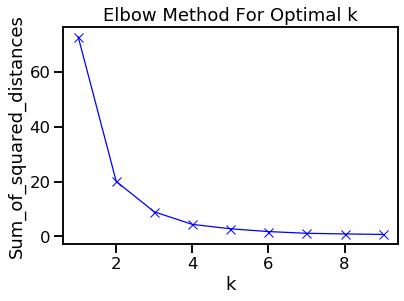

In [31]:
#Find rank clusters:
rankcluster=pd.DataFrame({'male rank cluster':bdata['male_rank_transform']}) #create dataframe that fits kmeans requirement

#Use Elbow Method to check for optimal number of clusters:

Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(rankcluster)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

#k=3 seems to be the optimal number of clusters. k=4 is not the optimal number of clusters, but I think will be more 
#visually digestable in depicting any potential patterns, and still represents a decent bend in the graph and thus a 
#reasonable value, thus I have opted to go with k=4.

#https://blog.cambridgespark.com/how-to-determine-the-optimal-number-of-clusters-for-k-means-clustering-14f27070048f
#This blog post was very helpful for using the elbow method

In [32]:
#perform k means clustering into 4 clusters
km=KMeans(n_clusters=4, random_state=0)
clust=km.fit_predict(rankcluster)

bdata['Male Rank Cluster']=clust

display(bdata.head(20))

,female_id,male_id,cycle_id,consort,conceptive,female_age,male_rank,males_present,females_present,male_rank_transform,Male Rank Cluster
0,ABB,LUI,5068,1,0,7.156742,3,6,9,0.100575,3
1,ABB,IAG,5068,0,0,7.156742,6,6,9,0.017162,0
2,ABB,LAX,5068,0,0,7.156742,1,6,9,0.326917,1
3,ABB,LEB,5068,0,0,7.156742,2,6,9,0.181328,2
4,ABB,NAW,5068,0,0,7.156742,5,6,9,0.030942,0
5,ABB,ZIB,5068,0,0,7.156742,4,6,9,0.055785,0
6,ABB,LUI,5073,1,0,7.252567,4,7,9,0.066666,3
7,ABB,FIG,5073,0,0,7.252567,1,7,9,0.305485,1
8,ABB,IAG,5073,0,0,7.252567,7,7,9,0.014549,0
9,ABB,LAX,5073,0,0,7.252567,2,7,9,0.183920,2


In [33]:
#As clusters don't occur is ascending order, have to make them ascend with increasing rank:
bdata.loc[bdata['Male Rank Cluster'] == 0, 'Male Rank Cluster']=11
bdata.loc[bdata['Male Rank Cluster'] == 3, 'Male Rank Cluster']=22
bdata.loc[bdata['Male Rank Cluster'] == 2, 'Male Rank Cluster']=33
bdata.loc[bdata['Male Rank Cluster'] == 1, 'Male Rank Cluster']=44

bdata.loc[bdata['Male Rank Cluster'] == 11, 'Male Rank Cluster']=1
bdata.loc[bdata['Male Rank Cluster'] == 22, 'Male Rank Cluster']=2
bdata.loc[bdata['Male Rank Cluster'] == 33, 'Male Rank Cluster']=3
bdata.loc[bdata['Male Rank Cluster'] == 44, 'Male Rank Cluster']=4

#Needed 2 steps, otherwise when changing later values, would change previously changed values if those previously
#changed values were the same as the ones currently being replaced.

Now, for each male, I calculate his consortship proportion (# cycles in which he consorted / # of cycles in which he mated) when he occupied a rank in each rank-cluster he ever occupied.

In [34]:
grouped=bdata.groupby(['male_id', 'conceptive', 'Male Rank Cluster'])

prop=pd.DataFrame({"num_consort" : grouped['consort'].sum(),
                   "num_mating" : grouped['conceptive'].count(),
                   "avg_rank": grouped['male_rank_transform'].mean(),
                   "Consortship Proportion": grouped['consort'].sum()/grouped['conceptive'].count()
                  })

prop = prop.reset_index()
prop.loc[prop['conceptive'] == 0, 'conceptive']='No'
prop.loc[prop['conceptive'] == 1, 'conceptive']='Yes'

propFilt=prop[prop['num_mating'] > 5] #filter out males present in very few cycles as this will skew proportion greatly

C:\Users\lukec\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



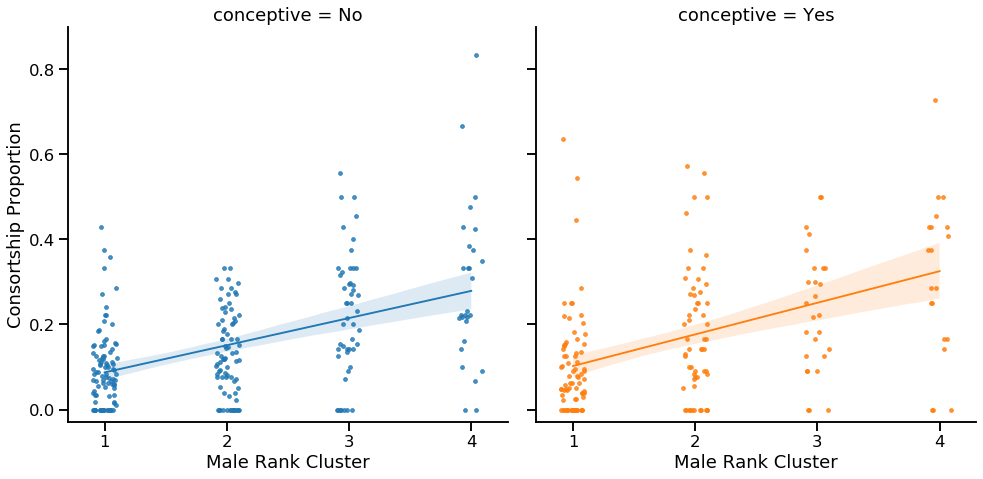

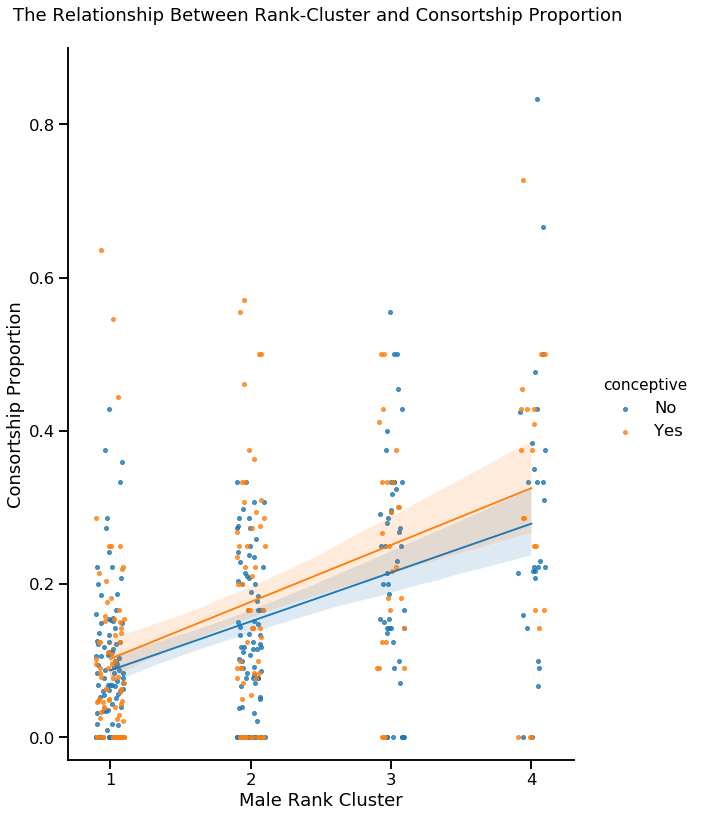

In [35]:
#I found the Seaborn library was very effective in allowing me to plot and explore the data

seaborn.set_context("talk", rc={"lines.linewidth": 1.25})

#plot scatter plot of values in each rank-cluster and consortship proportion with regression line:

a=seaborn.lmplot(x='Male Rank Cluster', 
               y='Consortship Proportion', 
               hue='conceptive',col='conceptive', height= 7, 
               markers='o', x_jitter=0.1, 
               data=propFilt, scatter_kws={"s": 14})
a.set(xlim=(0.7,4.3), 
ylim=(-0.03,0.9), 
xticks=[1,2,3,4],
yticks=[0,0.2,0.4,0.6,0.8])
plt.show()

b=seaborn.lmplot(x='Male Rank Cluster', 
               y='Consortship Proportion', 
               hue='conceptive', height= 7, 
               markers='o', x_jitter=0.1, 
               data=propFilt, scatter_kws={"s": 16})
b.set(xlim=(0.7,4.3), 
ylim=(-0.03,0.9), 
xticks=[1,2,3,4],
yticks=[0,0.2,0.4,0.6,0.8])
b.fig.set_size_inches(10.5,12)
plt.title('The Relationship Between Rank-Cluster and Consortship Proportion \n')
plt.show()


- **Relationship between the variables.**
The above graphs show the distribution of the consortship proportion on the y axis for males in each rank cluster, while any change in location on the x axis is just jitter to enhance ability to see the points. A linear regression line runs through the points. The shaded area around the line represents a 95% confidence interval. There is an apparent positive relationship between a male's rank and his consortship proportion for both conceptive and non-conceptive cycles. 


- **Relationship for Conceptive and Non-Conceptive cycles.**
I was interested in whether this relationship would differ between conceptive and non-conceptive cycles, but from the visualization with both plots combined, it appears that they do not; since the confidence intervals overlap at all places, we can not infer that the regression lines between these two data subsets differ.
This lack of a difference between conceptive and non-concpetive cycles is surprising, as we would expect males to prioritize consortship effort to conceptive cycles as these offer the highest chance of siring an infant. Thus, initially I had expected the slope of the relationship between rank and consortship proportion to be steeper as dominant males, who are unconstrained in consortship, would exclude other males at this time. However, female sexual swellings are a only a probabilistic signal of fertility (Nunn, 1999); females have evolved to give imperfect information to males as a means of breaking male monopoly. Thus, it is likely the case that males are not able to tell conceptive cycles from non-conceptive ones with 100% accuracy.

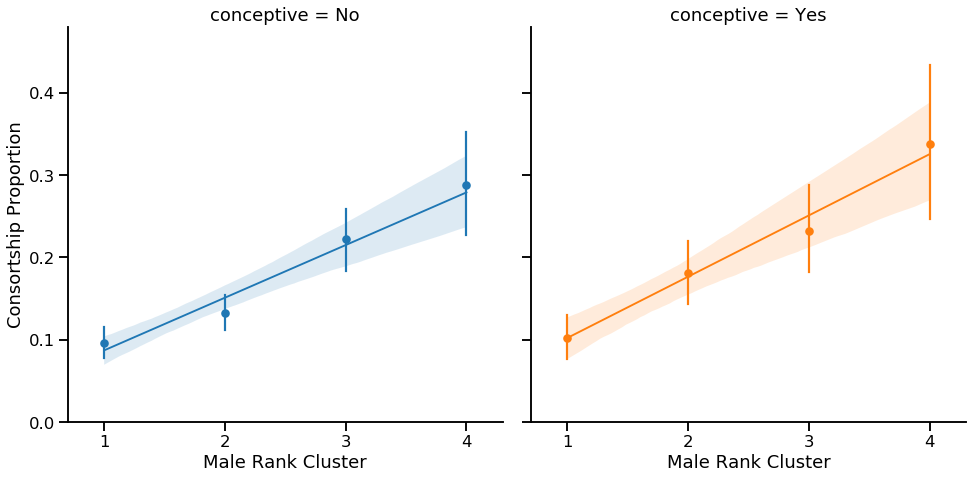

In [36]:
c=seaborn.lmplot(x='Male Rank Cluster', 
               y='Consortship Proportion', 
               col='conceptive',
               hue='conceptive', 
               height= 7, 
               markers='o', 
               x_jitter=0.15, 
               data=propFilt, 
               x_estimator=np.mean, x_ci=95)

c.set(xlim=(0.7,4.3), 
ylim=(0,0.48), 
xticks=[1,2,3,4],
yticks=[0,0.1,0.2,0.3,0.4, 0.5])

plt.show()


This plot shows a regression line as well as the mean consortship proportions for the different clusters. As can be seen, the confidence intervals for the means of adjacent clusters sometimes overlap, meaning that these clusters seem to not differ in their mean value. However, the CIs of non-adjacent plots often do not overlap, so we can infer with 95% confidence that these clusters have different means.

## Guiding Question 2: Effectiveness and Male Motivation for Forming Consortships

As consortship is costly to males in terms of time, energy, and lost opportunities (Alberts et al., 1996), we would expect males to only engage in consortship when the potential benefits are greatest. For example, benefits can change with female age, as the probability of conception for female baboons is highest around age 14 (Tung et al., 2012). As consortships are intended to prevent other males from having access to the female, we would also expect that some males are unable to mate with females who are experiencing being consorted. The following questions serve to investigate these effects:
- Does the presence of a consort affect the proportion of males in the group that the female is able to mate with during her cycle?
- Does female age influence her likelihood of being consorted, or the number of consorts she has during her cycle?
- Are consortships more likely to occur during conceptive cycles?

### Does the presence of a consort affect the proportion of males the female is able to mate with during her cycle?

To calculate the proportion of males the female mated with, a count was taken of the number of males mated with per cycle divided by the number of available males present in the group (recorded in the dataset). Available males refers to sexually mature male baboons.

In [37]:
#group data by female and cycle id
group = bdata.groupby(["female_id","cycle_id"])

#dataframe of proportions data
propByConsort = pd.DataFrame({"num_consort": group["consort"].sum(),
                     "num_male_mated": group["male_id"].count(),
                     "males_present": group["males_present"].max(),
                     
                     #calculate proportion of males the female mated with in that cycle
                     "proportion": group["male_id"].count() / group["males_present"].max(),
                              
                     #yes/no for whether any consortship was formed
                     "consort_presence": group["consort"].sum().apply(lambda x: 'yes' if x > 0 else 'no'),
                     
                     "female_age": group["female_age"].mean()
                    })
display(propByConsort.head(5))
print("Total number of rows:", len(propByConsort.index))

num_consort  num_male_mated  males_present  proportion  \
female_id cycle_id                                                           
ABB       5068                1               6              6         1.0   
          5073                1               7              7         1.0   
          5078                1               7              7         1.0   
          5083                1               7              7         1.0   
          5087                1               6              6         1.0   

                   consort_presence  female_age  
female_id cycle_id                               
ABB       5068                  yes    7.156742  
          5073                  yes    7.252567  
          5078                  yes    7.353867  
          5083                  yes    7.441478  
          5087                  yes    7.534565

Total number of rows: 1601


In [38]:
#plot of # of consortships to proportion of males mated with
propByConsortfig1 = go.Figure()
propByConsortfig1.add_trace(go.Box(y=propByConsort["proportion"], x=propByConsort["num_consort"], boxmean=True))
propByConsortfig1.update_layout(
    title=go.layout.Title(text="Proportion of Males Mated With Per Cycle and Number of Consorts"),
    xaxis=go.layout.XAxis(title=go.layout.xaxis.Title(text="Number of Different Males that Formed Consortships During The Cycle")),
    yaxis=go.layout.YAxis(title=go.layout.yaxis.Title(text="Proportion of Availiable Males Mated With"))
    )
propByConsortfig1.show()

#plot of presence of consortship to proportion of males mated with
propByConsortfig2 = go.Figure()
propByConsortfig2.add_trace(go.Box(y=propByConsort["proportion"], x=propByConsort["consort_presence"], boxmean=True))
propByConsortfig2.update_layout(
    title=go.layout.Title(text="Proportion of Males Mated With Per Cycle and Presence of a Consort"),
    xaxis=go.layout.XAxis(title=go.layout.xaxis.Title(text="Presence of a Consortship")),
    yaxis=go.layout.YAxis(title=go.layout.yaxis.Title(text="Proportion of Availiable Males Mated With"))
    )
propByConsortfig2.show()

From the above plots we can see that many females mate with all of the available males in their group during their cycle (proportion = 1). The number of consorts doesn't appear to impact that proportion. In fact, the median and mean proportions of males mated with are higher when there is a consort compared to where there is none. This could be due to several factors.

#### Consortship Time
Consortships are defined as remaining close to the female for anywhere between a number of hours to a number of days. The data was collected in the five-day window of the female's cycle when conception is most likely (Tung et al., 2012). We don't have data for how long the consortship lasted, though we can see that there can be multiple consorts during that five-day window. 

#### Number of Matings
We also don't have the data for the number of times each male mated with the female. The proportion of consortship time is predictive of paternity success (Tung et al., 2012) as the male is able to mate with the female multiple times during that period. We would expect that the males that formed consortships mated with the female more often than the other males in the group, but by looking at the proportion of males mated with we can see that the other males were still able to access the female at least once.

#### Desirability and Mate Choice
The next thing to take into account would be desirability of the female and female mate choice. Females that had no consorts have a wider spread of the proportions of males mated with, and some have very low proportions (indicated they mated with very few different males). It's possible that these females were less desirable to the males for a variety of reasons, such as their rank or age (less likely to concieve). If fewer males were competing for access, there benefits of forming a consortship wouldn't be as strong. Female mate choice refers to the female choosing which males they want to mate with, and could be another reason behind a lower proportion.

### Strange Data
There are 3 datapoints on the boxplots where the proportion of males mated with are greater than 1, meaning the female mated with more males than there are present in the group. This could be an error, or it could mean she mated with a male outside of their group. For baboons, young adult males disperse from their natal group (Tung et al., 2012), meaning that they leave the group they were born in and eventually find another group to join. 

There is also one example of a female that had 6 different males form consortships with her. While odd, it is possible if the consortships were short.

In [39]:
#exploring strange data, proporitons higher than 1
display(propByConsort[propByConsort["proportion"] > 1])

display(bdata[(bdata["female_id"] == "DUD") & (bdata["cycle_id"] == 7137)])
display(bdata[(bdata["female_id"] == "NUT") & (bdata["cycle_id"] == 16480)])
display(bdata[(bdata["female_id"] == "VIV") & (bdata["cycle_id"] == 22464)])

,,num_consort,num_male_mated,males_present,proportion,consort_presence,female_age
female_id,cycle_id,,,,,,
DUD,7137,3,7,6,1.166667,yes,17.188227
NUT,16480,2,10,9,1.111111,yes,9.979466
VIV,22464,2,6,5,1.200000,yes,13.960301


,female_id,male_id,cycle_id,consort,conceptive,female_age,male_rank,males_present,females_present,male_rank_transform,Male Rank Cluster
1168,DUD,NYU,7137,1,0,17.188227,1,6,17,0.326917,4
1169,DUD,APH,7137,1,0,17.188227,7,6,17,0.009519,1
1170,DUD,GAS,7137,1,0,17.188227,5,6,17,0.030942,1
1171,DUD,EXO,7137,0,0,17.188227,2,6,17,0.181328,3
1172,DUD,NAT,7137,0,0,17.188227,3,6,17,0.100575,2
1173,DUD,REX,7137,0,0,17.188227,4,6,17,0.055785,1
1174,DUD,SPY,7137,0,0,17.188227,6,6,17,0.017162,1


,female_id,male_id,cycle_id,consort,conceptive,female_age,male_rank,males_present,females_present,male_rank_transform,Male Rank Cluster
7313,NUT,GYP,16480,1,1,9.979466,6,9,22,0.043750,1
7314,NUT,ORN,16480,1,1,9.979466,7,9,22,0.031034,1
7315,NUT,APO,16480,0,1,9.979466,8,9,22,0.022014,1
7316,NUT,EBA,16480,0,1,9.979466,2,9,22,0.172793,3
7317,NUT,FIG,16480,0,1,9.979466,3,9,22,0.122572,2
7318,NUT,GAS,16480,0,1,9.979466,10,9,22,0.011077,1
7319,NUT,LIB,16480,0,1,9.979466,11,9,22,0.007858,1
7320,NUT,OBR,16480,0,1,9.979466,4,9,22,0.086947,2
7321,NUT,REX,16480,0,1,9.979466,1,9,22,0.243592,4
7322,NUT,TAL,16480,0,1,9.979466,5,9,22,0.061676,2


,female_id,male_id,cycle_id,consort,conceptive,female_age,male_rank,males_present,females_present,male_rank_transform,Male Rank Cluster
9905,VIV,LIO,22464,1,0,13.960301,1,5,9,0.343080,4
9906,VIV,DAL,22464,1,0,13.960301,5,5,9,0.023391,1
9907,VIV,MLO,22464,0,0,13.960301,6,5,9,0.011953,1
9908,VIV,ORB,22464,0,0,13.960301,4,5,9,0.045776,1
9909,VIV,PIS,22464,0,0,13.960301,2,5,9,0.175312,3
9910,VIV,VEG,22464,0,0,13.960301,3,5,9,0.089583,2


In [40]:
#exploring strange data, 6 consorts
display(propByConsort[propByConsort["num_consort"] >= 6])

display(bdata[(bdata["female_id"] == "NIX") & (bdata["cycle_id"] == 16122)])

,,num_consort,num_male_mated,males_present,proportion,consort_presence,female_age
female_id,cycle_id,,,,,,
NIX,16122,6,9,9,1.0,yes,9.880903


,female_id,male_id,cycle_id,consort,conceptive,female_age,male_rank,males_present,females_present,male_rank_transform,Male Rank Cluster
7067,NIX,KEI,16122,1,0,9.880903,1,9,20,0.243592,4
7068,NIX,DEN,16122,1,0,9.880903,3,9,20,0.122572,2
7069,NIX,FAV,16122,1,0,9.880903,2,9,20,0.172793,3
7070,NIX,RUT,16122,1,0,9.880903,7,9,20,0.031034,1
7071,NIX,NEL,16122,1,0,9.880903,9,9,20,0.015616,1
7072,NIX,LEO,16122,1,0,9.880903,10,9,20,0.011077,1
7073,NIX,HOB,16122,0,0,9.880903,6,9,20,0.043750,1
7074,NIX,KAK,16122,0,0,9.880903,8,9,20,0.022014,1
7075,NIX,PEP,16122,0,0,9.880903,4,9,20,0.086947,2


### Does female age influence the number of consorts she has during her cycle?
The original dataset included female age and a transformed value. The transformation took into account the ages where female baboons were most fertile (~14), creating values between 0 and -1. This visualization was not that useful. The transformed age added a layer of obscurity to the meaning of the data. It also assigned negative values regarless of whether the female was above or below the most fertile age, creating a heavy skew and a loss of information. We used the untransformed values of female age.

In [41]:
#plot of # of consortships to female age
propByConsortfig3 = go.Figure()
propByConsortfig3.add_trace(go.Box(y=propByConsort["female_age"], x=propByConsort["num_consort"], boxmean=True))
propByConsortfig3.update_layout(
    title=go.layout.Title(text="Boxplot of Female Age and Number of Consorts"),
    xaxis=go.layout.XAxis(title=go.layout.xaxis.Title(text="Number of Different Males that Formed Consortships During The Cycle")),
    yaxis=go.layout.YAxis(title=go.layout.yaxis.Title(text="Female's Age During the Cycle"))
    )
propByConsortfig3.show()

#plot of presence of consortship to female age
propByConsortfig4 = go.Figure()
propByConsortfig4.add_trace(go.Box(y=propByConsort["female_age"], x=propByConsort["consort_presence"], boxmean=True))
propByConsortfig4.update_layout(
    title=go.layout.Title(text="Boxplot of Female Age and Presence of a Consort"),
    xaxis=go.layout.XAxis(title=go.layout.xaxis.Title(text="Presence of a Consortship")),
    yaxis=go.layout.YAxis(title=go.layout.yaxis.Title(text="Female's Age During the Cycle"))
    )
propByConsortfig4.show()

From the plot we can see that the means and medians of female age don't vary a lot with the number of consorts she has. For baboons the age at which probability of conception is highest is 14 (Tung et al., 2012). There is less spread in age as the number of consorts increases, but there is also less data for those categories. Looking at the presence of consortship, the mean age for females for the observed matings was ~11 and median age ~10. The females with 3 or 4 different consorts appear to be slightly younger (mean ~10, median ~9), but overall age doesn't appear to have a strong effect on whether or not a consortship is formed.

### Are consortships more likely to occur during conceptive cycles?

Females undergoing conceptive cycles would be the most beneficial for males to consort, as the likelihood of conception is greatest during conceptive cycles. The female's sexual swellings are also larger during conceptive cycles, meaning that males may be able to preferentially target them. Thus, we were interested in whether females received more consorts when undergoing conceptive cycles.

To answer this question, 
First, a bit of data wrangling to create a subset dataframe with the relevant columns (cycle_id and conceptive) from the source dataframe.
Then, a new column (propconsorted) is created to show the calculated ratio of consortships to the total number of matings for each cycle. 
Finally, a box plot is used to visually compare the proportion of consortships in conceptive cycles and proportion of consortships in non conceptive cycles.

In [42]:
# View of source dataframe
bdata.head(2)

# Drop irrelevant columns
bdata2 = bdata.drop(columns=['male_rank_transform', 'females_present', 'males_present', 'male_rank', 'female_age'])
bdata2

# Creation of the proportion column, for data frame cc.
group2 = bdata2.groupby(["cycle_id", "conceptive"])


cc = pd.DataFrame({
                   "propconsorted" : (group2["consort"].sum())/(group2["consort"].count())
                        })
cc.reset_index(inplace = True)
display(cc.head())

,cycle_id,conceptive,propconsorted
0,5068,0,0.166667
1,5073,0,0.142857
2,5078,0,0.142857
3,5083,0,0.142857
4,5087,0,0.166667


In [43]:
#plot of Proportion of consortships for conceptive (1) and non-conceptive (0) grouping by cycle id
fig5 = go.Figure()
fig5.add_trace(go.Box(y=cc["propconsorted"], x=cc["conceptive"], boxmean=True))

fig5.update_layout(
    title=go.layout.Title(text="Proportion of consortships for non-conceptive (0) and conceptive (1) cycles"),
    xaxis=go.layout.XAxis(title=go.layout.xaxis.Title(text="non-conceptive (0) and conceptive (1) cycles")),
    yaxis=go.layout.YAxis(title=go.layout.yaxis.Title(text="Proportion of Consortships per Cycle"))
    )
fig5.show()

Findings,
From the box plot, we can deduce that from the data set, on average 18% of consortships happened in a conceptive cycle compared to 15% of consortships during a non conceptive cycle. 
Further investigation will be required to know if there is any statistical difference between the two data.

Analysis done by grouping the cycle id is repeated grouping the Female id, to check if the higher proportion of consortship also happens when grouped by female.

In [44]:
# Grouping the data by Female ID
group3 = bdata2.groupby(["female_id", "conceptive"])


ccc = pd.DataFrame({
                   "propconsorted" : (group3["consort"].sum())/(group3["consort"].count())
                        })
ccc.reset_index(inplace = True)
display(ccc.head()) 

,female_id,conceptive,propconsorted
0,ABB,0,0.137931
1,ABB,1,0.166667
2,ACA,0,0.142857
3,ACA,1,0.173913
4,ASH,0,0.093023


In [45]:
cc1 = ccc[ccc["conceptive"]==1]  # Data frame - Filtering the conceptive cycles, after grouping by female_id
cc0 = ccc[ccc["conceptive"]==0]  # Data frame - Filtering the non-conceptive cycles, after grouping by female_id
cc0 = cc0.sort_values(by=['female_id'])
cc1 = cc1.sort_values(by=['female_id'])
cc1 = cc1.head(10)

In [46]:
# Scatter plot showing Proportion of consorts for each female for both conceptive and non-conceptive cycles
fig6 = go.Figure()
fig6.add_trace(go.Scatter(x=cc1["female_id"], y= cc1["propconsorted"],
                          mode = 'markers',
                          name = 'conceptive'))
fig6.add_trace(go.Scatter(x=cc1["female_id"], y= cc0["propconsorted"],
                          mode = 'markers',
                          name = 'non-conceptive'))
                
fig6.update_layout(
    title=go.layout.Title(text="Proportion of consorts for each female"),
    xaxis=go.layout.XAxis(title=go.layout.xaxis.Title(text="Female_id")),
    yaxis=go.layout.YAxis(title=go.layout.yaxis.Title(text="Proportion of Consorts"))
    )
fig6.show()

The scatter plot above representing the data for first 10 females in alphabetical order shows a generally higher proportion of consorts during conceptive cycle (blue) vs non-conceptive cycle (red)

In [47]:
# Bar charts showing Proportion of consorts for each female for both conceptive and non-conceptive cycles
fig7 = go.Figure(data=[
    go.Bar(name='Conceptive', x=cc1["female_id"], y= cc1["propconsorted"]),
    go.Bar(name='Non-conceptive', x=cc1["female_id"], y= cc0["propconsorted"])
])
fig7.update_layout(
    title=go.layout.Title(text="Proportion of consortships for non-conceptive and conceptive by Female"),
    xaxis=go.layout.XAxis(title=go.layout.xaxis.Title(text="Female Id")),
    yaxis=go.layout.YAxis(title=go.layout.yaxis.Title(text="Proportion of Consortships per Female"))
    )

# Change the bar mode
fig7.update_layout(barmode='group')
fig7.show()

The bar chart above represents the data for first 10 females in alphabetical order showing a generally higher proportion of consorts during conceptive cycle (blue) vs non-conceptive cycle (red).
The conceptive cycle data for CAI was not available in the dataset.
Sorting by proportion was not really required as the analysis was on the population on the whole and not specific females.

In [48]:
#plot of Proportion of consortships for conceptive (1) and non-conceptive (0) grouping by Female
fig8 = go.Figure()
fig8.add_trace(go.Box(y=ccc["propconsorted"], x=ccc["conceptive"], boxmean=True))
fig8.update_layout(
    title=go.layout.Title(text="Proportion of consortships for non-conceptive (0) and conceptive (1) by Females"),
    xaxis=go.layout.XAxis(title=go.layout.xaxis.Title(text="non-conceptive (0) and conceptive (1) by Females")),
    yaxis=go.layout.YAxis(title=go.layout.yaxis.Title(text="Proportion of Consortships per Female"))
    )
fig8.show()

Findings,
From the box plot, we can deduce that on average 15.3% of consortships occured in a conceptive cycle compared to 13.5% of consortships during a non conceptive cycle. 
Further investigation will be required to know if there is any statistical difference between the two data.

## Conclusions

conclude with the lessons you learnt, the insight you gained, and suggestions for future modeling and exploration opportunities.  

From visually inspecting the data, we can conclude that:

-Rank has a positive relationship with consortship ability, and this relationship does not differ between conceptive and non-conceptive cycles, perhaps indicating that males have imperfect information on female fertility and so can't target conceptive cycles with a great degree of accuracy. 

-Females with consorts were still able to mate with a high proportion of the males in their group

-The female’s age did not seem to affect her likelihood of being consorted

-There were slightly more consortships during conceptive cycles compared with non-conceptive cycles.

Further exploration:

- **Female rank, rank interact, and genetics.** Using this dataset other models could look into the effects of female rank, and the interaction between male and female rank, on consortship. There is also genetic data availiable that measures relatedness and hybridization.
- **Length of the consortship.** As consortships can last for hours to days, a future study could look into what influence investing more/less time in consortship has on male reproductive success. Additionally, it could investigate whether conceptive cycles receiver longer consortships.
- **Number of matings.** Many female baboons mated with a high proportion of the availiable males in their group. Recording the exact number of times a male was able to mate with the female could show the effectiveness of consortships more clearly than a presenece/absence measure.
- **Paternity if the female did conceive.** Using genetic data, it would be interesting to see how consortship or number of copulations determines which male sires a female's offspring.
- **Number of females cycling.** It would also be interesting to see how the number of females cycling at the same time influences how males allocate their consortship effort among these females and, if they prioritize some females over others, which characteristics of females they use to make this judgement.
- **Baboon Geo-location / weather data.** Having the geo location data for the baboons could have aided in visualizing their location on maps and help evaluate environmental impact on consortships.

### References
Alberts, S.C., Altmann, J. and Wilson, M.L., 1996. Mate guarding constrains foraging activity of male baboons.
Animal Behaviour, 51(6), pp.1269-1277.

Alberts, S.C., Watts, H.E. and Altmann, J., 2003. Queuing and queue-jumping: long-term patterns of
reproductive skew in male savannah baboons, Papio cynocephalus. Animal Behaviour, 65(4), pp.821-840.

Alberts, S.C., Buchan, J.C. and Altmann, J., 2006. Sexual selection in wild baboons: from mating opportunities
to paternity success. Animal Behaviour, 72(5), pp.1177-1196.

Altmann, J., 1988. Determinants of reproductive success in savannah baboons, Papio cynocephalus.
Reproductive success.

Dryad Digital Repository, 2016. Baboon Mating and Genetic Admixture [Online]. Kaggle. Available at:
https://www.kaggle.com/dryad/baboon-mating/data (Accessed: 25 September 2019).

Gesquiere, L.R., Wango, E.O., Alberts, S.C. and Altmann, J., 2007. Mechanisms of sexual selection: sexual
swellings and estrogen concentrations as fertility indicators and cues for male consort decisions in wild
baboons. Hormones and behavior, 51(1), pp.114-125.

Nunn, Charles L. "The evolution of exaggerated sexual swellings in primates and the graded-signal hypothesis." Animal behaviour 58.2 (1999): 229-246.

Seyfarth, R.M., 1978. Social relationships among adult male and female baboons. I. Behaviour during sexual
consortship. Behaviour, 64(3-4), pp.204-226.

Tung, J., Charpentier, M.J.E., Mukherjee, S., Altmann, J., Alberts, S.C., 2012. Genetic Effects on Mating Success
and Partner Choice in a Social Mammal. The American Naturalist, 180(1), pp. 113-129.

Wildt, D.E., Doyle, L.L., Stone, S.C. and Harrison, R.M., 1977. Correlation of perineal swelling with serum
ovarian hormone levels, vaginal cytology, and ovarian follicular development during the baboon reproductive
cycle. Primates, 18(2), pp.261-270.